In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("studyhours.csv")

In [3]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Study Hours  33 non-null     float64
 1   Exam Score   33 non-null     float64
dtypes: float64(2)
memory usage: 660.0 bytes


In [5]:
df.describe()

,Study Hours,Exam Score
count,33.000000,33.000000
mean,15.772727,74.612121
std,7.608723,18.711206
min,3.000000,40.000000
25%,9.600000,58.500000
50%,17.400000,78.800000
75%,21.300000,90.800000
max,30.000000,100.000000


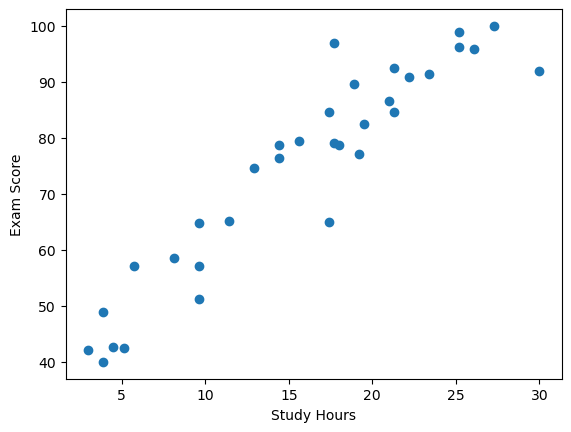

In [6]:
plt.scatter(df["Study Hours"],df["Exam Score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.show()

In [7]:
#independent and dependent features
X=df[["Study Hours"]]
y=df["Exam Score"]

In [8]:
type(X)

pandas.core.frame.DataFrame

In [9]:
type(y)

pandas.core.series.Series

In [10]:
# test - train split

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=15)

In [13]:
len(y_train)

26

In [14]:
len(y_test)

7

In [15]:
# standardize the data set

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
df.head()

,Study Hours,Exam Score
0,3.9,40.0
1,9.6,57.1
2,4.5,42.7
3,11.4,65.1
4,14.4,78.7


In [18]:
# balanced featre values
# efficient gradient descent
# l1,l2

In [19]:
scaler = StandardScaler()

In [20]:
X_train

,Study Hours
18,17.4
1,9.6
2,4.5
32,18.9
6,19.2
3,11.4
29,19.5
26,9.6
9,17.4
4,14.4


In [21]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #data leakage

In [22]:
X_train

array([[ 0.11794385],
       [-0.97424848],
       [-1.68837424],
       [ 0.32798083],
       [ 0.36998823],
       [-0.7222041 ],
       [ 0.41199563],
       [-0.97424848],
       [ 0.11794385],
       [-0.30213013],
       [ 0.15995124],
       [ 0.66404001],
       [-0.13410054],
       [ 1.50418796],
       [-0.51216711],
       [ 0.15995124],
       [-0.30213013],
       [ 1.21013618],
       [ 1.33615837],
       [ 0.7900622 ],
       [-1.77238903],
       [-1.89841122],
       [ 0.20195864],
       [ 1.88225453],
       [-1.18428547],
       [ 1.21013618]])

In [23]:
X_test

array([[-1.60435944],
       [ 0.62203261],
       [ 0.95809179],
       [-1.52034465],
       [-0.97424848],
       [-1.77238903],
       [ 0.66404001]])

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
regression= LinearRegression()

In [26]:
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
print("Coefficient : ",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient :  [16.17860223]
Intercept: 76.9076923076923


In [28]:
# y = 76.90 + 16.18 x

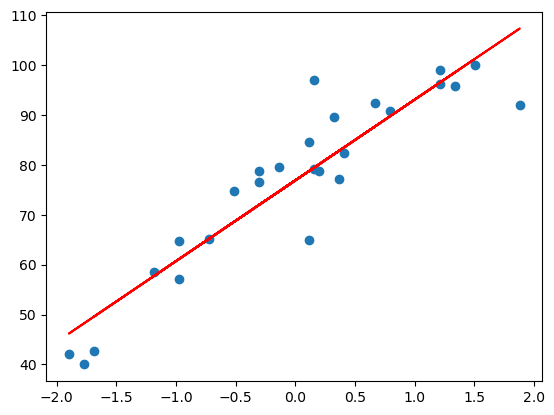

In [29]:
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),"r")
plt.show()

In [30]:
# 20 saat çalışan kişinin kaç puan alacağı
# x= 20 , y= ?

In [31]:
regression.predict(scaler.transform([[20]]))

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([84.70590731])

In [32]:
# prediction with test data

In [34]:
y_pred_test = regression.predict(X_test)

In [43]:
y_pred_test

array([50.95139904, 86.97131054, 92.40827832, 52.31064098, 61.14571361,
       48.23291515, 87.65093152])

In [35]:
y_test

25    42.4
14    86.6
30    91.5
16    57.2
24    51.2
20    49.0
19    84.7
Name: Exam Score, dtype: float64

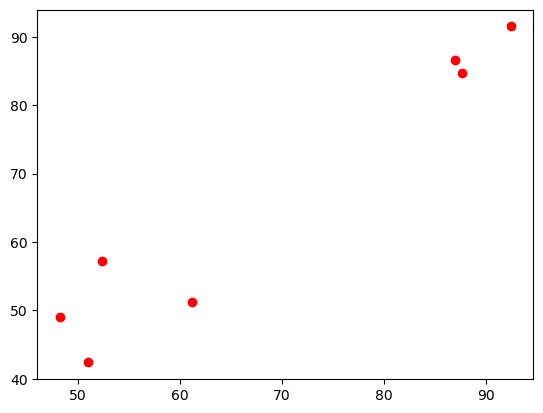

In [38]:
plt.scatter(y_pred_test,y_test,color="r")
plt.show()

In [40]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [41]:
mse = mean_squared_error(y_test,y_pred_test)
mae = mean_absolute_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
print("mse: ",mse)
print("mae: ",mae)
print("rmse: ",rmse)

mse:  29.45839048833392
mae:  4.054868128856142
rmse:  5.427558427906043


In [42]:
r2 = r2_score(y_test,y_pred_test)
print("r2 score :",r2)

r2 score : 0.9196596206825491
